In [59]:
import seaborn as sns
import nltk
import collections as co
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
sns.set(font_scale=2)

In [109]:
df = pd.read_csv('finalData.csv')#, encoding='cp437')
df.head()

,Unnamed: 0,title,country,date_added,release_year,mpaa rating,duration,listed_in,description,user_rating
0,4,Limitless,United States,"July 1, 2016",2016,TV-14,1 Season,"Crime TV Shows, TV Dramas, TV Sci-Fi & Fantasy",A failed musician unleashes his brain's full p...,84.0
1,5,Gilmore Girls: A Year in the Life,United States,"November 25, 2016",2016,TV-14,1 Season,"TV Comedies, TV Dramas, Teen TV Shows",Set nearly a decade after the finale of the or...,77.0
2,8,Charmed,United States,"October 1, 2017",2005,TV-PG,8 Seasons,"Romantic TV Shows, TV Comedies, TV Dramas",After a trio of sisters discover an ancient te...,90.0
3,10,Revenge,NaN,"May 2, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",After a mother and her daughter are gang-raped...,84.0
4,11,The Jungle Book,"India, Germany, France","May 11, 2019",2010,TV-Y7,1 Season,Kids' TV,This animated series follows young Mowgli and ...,97.0


In [24]:
print('There are ',df['rating'].nunique(),'types of ratings in the dataset: ',df['rating'].unique())

In all, there are  7 types of ratings in the dataset:  ['TV-14' 'TV-PG' 'TV-MA' 'TV-Y7' 'TV-G' 'TV-Y' 'TV-Y7-FV']


In [124]:
df[['month_added','year_added']] = df.date_added.str.split(",",expand=True,)
df

,Unnamed: 0,title,country,date_added,release_year,mpaa rating,duration,listed_in,description,user_rating,month_added,year_added
0,4,Limitless,United States,"July 1, 2016",2016,TV-14,1 Season,"Crime TV Shows, TV Dramas, TV Sci-Fi & Fantasy",A failed musician unleashes his brain's full p...,84.000000,July 1,2016
1,5,Gilmore Girls: A Year in the Life,United States,"November 25, 2016",2016,TV-14,1 Season,"TV Comedies, TV Dramas, Teen TV Shows",Set nearly a decade after the finale of the or...,77.000000,November 25,2016
2,8,Charmed,United States,"October 1, 2017",2005,TV-PG,8 Seasons,"Romantic TV Shows, TV Comedies, TV Dramas",After a trio of sisters discover an ancient te...,90.000000,October 1,2017
3,10,Revenge,NaN,"May 2, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",After a mother and her daughter are gang-raped...,84.000000,May 2,2019
4,11,The Jungle Book,"India, Germany, France","May 11, 2019",2010,TV-Y7,1 Season,Kids' TV,This animated series follows young Mowgli and ...,97.000000,May 11,2019
5,13,American Crime Story: The People v. O.J. Simpson,United States,"March 6, 2019",2016,TV-MA,1 Season,"Crime TV Shows, TV Dramas",This anthology series dramatizes historic crim...,79.000000,March 6,2019
6,14,Dave Chappelle,United States,"March 21, 2017",2017,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Comedy icon Dave Chappelle makes his triumphan...,94.000000,March 21,2017
7,17,Cheer Squad,United States,"March 14, 2017",2016,TV-PG,1 Season,"Reality TV, Teen TV Shows","Follow the Great White Sharks, a world-champio...",61.000000,March 14,2017
8,21,Barbie Life in the Dreamhouse,United States,"July 1, 2017",2012,TV-G,1 Season,"Kids' TV, TV Comedies",Join blond icon Barbie and her fabulous friend...,85.000000,July 1,2017
9,26,DreamWorks Shrek's Swamp Stories,United States,"August 17, 2012",2008,TV-PG,1 Season,"Kids' TV, TV Action & Adventure, TV Comedies","Shrek celebrates Halloween, Puss in Boots is c...",56.000000,August 17,2012


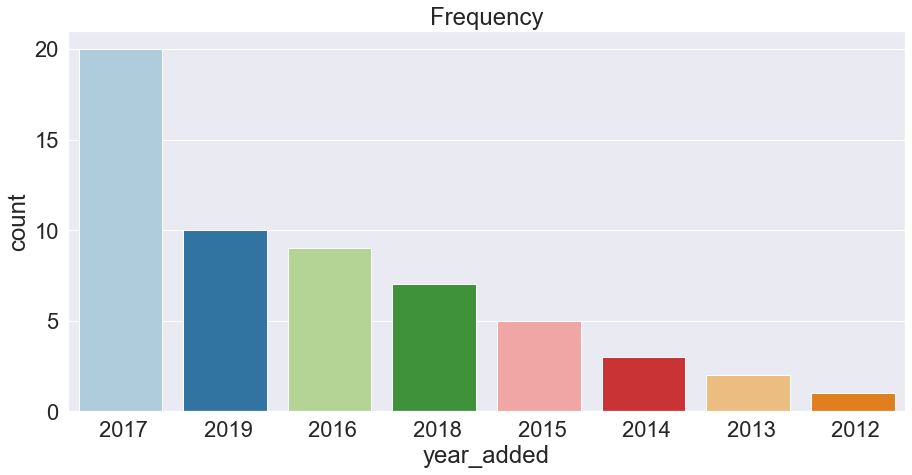

In [78]:
plt.figure(1, figsize=(15, 7))
plt.title("Frequency")
sns.countplot(x = "year_added", order=df['year_added'].value_counts().index[0:15] ,data=df,palette=sns.color_palette("Paired", 15))

# Description: This is a bar graph that shows the number of items released on Netflix for various years found in dataset. 

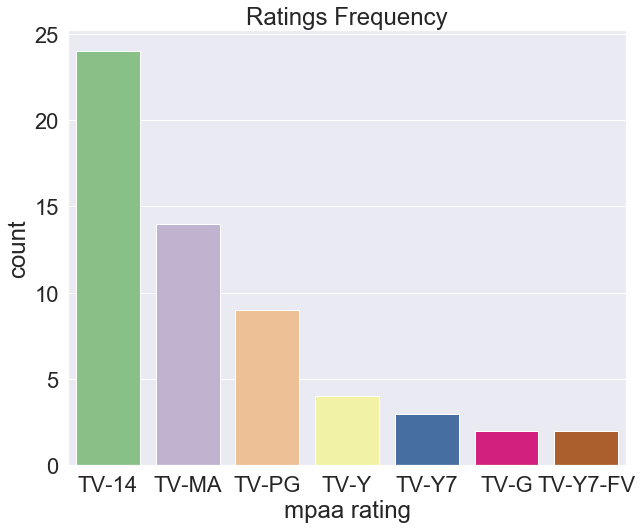

In [62]:
plt.figure(figsize=(10,8))
plt.title("Ratings Frequency")
sns.countplot(x='mpaa rating',data=df,order=df['mpaa rating'].value_counts().index,palette='Accent')
plt.show()

# Description: This is a bar graph that shows the frequency of various mpaa ratings in the csv file

Text(0.5, 1.0, 'User scores by Rating')

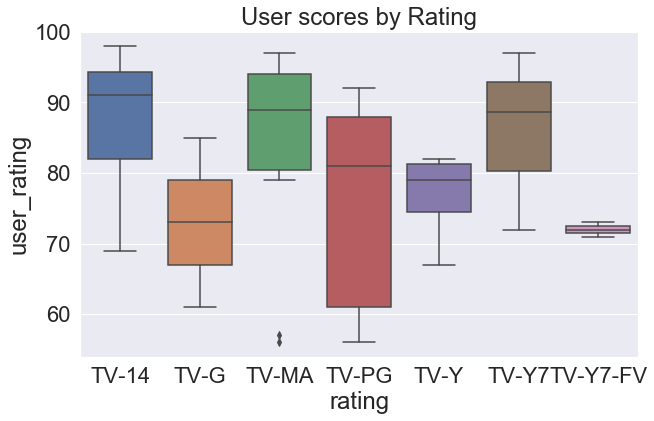

In [72]:
order = np.sort(df['rating'].unique())
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='user_rating', x='rating',order=order)
plt.title('User scores by Rating')

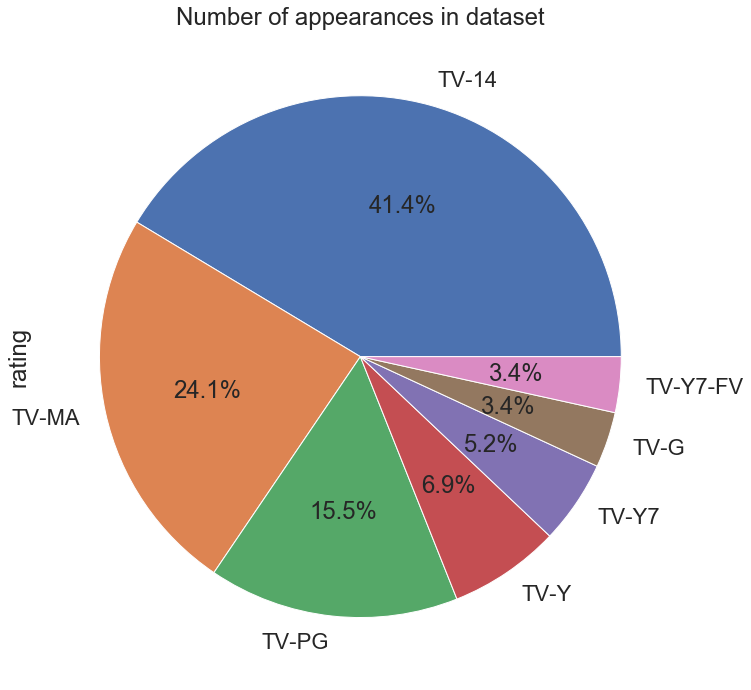

In [73]:
plt.figure(figsize=(12,12))
df.rating.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Number of appearances in dataset')
plt.show()

In [83]:
df1 = df
df1["year_added"] = df["year_added"].apply(lambda x: dateutil.parser.parse(x))
year = df["year_added"].dt.to_period("Y")
agg = df.groupby([year])
for group in agg:
    print(group)

NameError: name 'dateutil' is not defined

In [90]:
df_by_year = df.groupby('year_added')

In [128]:
list(df.groupby('year_added'))


[(' 2012',    Unnamed: 0                             title        country  \
  9          26  DreamWorks Shrek's Swamp Stories  United States   
  
          date_added  release_year mpaa rating  duration  \
  9  August 17, 2012          2008       TV-PG  1 Season   
  
                                        listed_in  \
  9  Kids' TV, TV Action & Adventure, TV Comedies   
  
                                           description  user_rating month_added  \
  9  Shrek celebrates Halloween, Puss in Boots is c...         56.0   August 17   
  
    year_added  
  9       2012  ),
 (' 2013',
      Unnamed: 0         title        country        date_added  release_year  \
  18          53   Gossip Girl  United States   October 8, 2013          2012   
  50         121  Breaking Bad  United States    August 2, 2013          2013   
  
     mpaa rating   duration                                listed_in  \
  18       TV-14  6 Seasons                 TV Dramas, Teen TV Shows   
  50       TV-

In [125]:
year1 = df.loc[df['year_added'] == 2017]

In [126]:
year1

,Unnamed: 0,title,country,date_added,release_year,mpaa rating,duration,listed_in,description,user_rating,month_added,year_added
